In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, Literal

In [2]:
class QuadraticEquation(TypedDict):
    a: float
    b:float
    c:float
    discriminant: float
    equation: str
    result: str
    

In [3]:
def show_equation(state:QuadraticEquation) -> QuadraticEquation:
    equation = f"{state['a']}x^2 + {state['b']}x + {state['c']}"
    return {"equation": equation}

In [4]:
def calculate_discriminant(state: QuadraticEquation) -> QuadraticEquation:
    discriminant = state['b']**2 - 4 * state['a'] * state['c']
    return {"discriminant": discriminant}

In [5]:
def real_roots(state: QuadraticEquation) -> QuadraticEquation:
    root1 = (-state['b'] + state['discriminant']**0.5) / (2 * state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5) / (2 * state['a'])
    result = f"Two real roots: {root1} and {root2}"
    
    return {"result": result}

In [6]:
def no_real_roots(state: QuadraticEquation) -> QuadraticEquation:
    result = "No real roots"
    return {"result": result}


In [7]:
def repeated_roots(state: QuadraticEquation) -> QuadraticEquation:
    root = -state['b'] / (2 * state['a'])
    result = f"One repeated root: {root}"
    
    return {"result": result}

In [8]:
def check_condition(state: QuadraticEquation) -> Literal['real', 'no_real', 'repeated']:
    if state['discriminant'] > 0:
        return 'real'
    elif state['discriminant'] == 0:
        return 'repeated'
    else:
        return 'no_real'
    


In [9]:
quad_state = StateGraph(QuadraticEquation)
quad_state.add_node("show_equation", show_equation)
quad_state.add_node("calculate_discriminant", calculate_discriminant)
quad_state.add_node("real_roots",real_roots)
quad_state.add_node("no_real_roots",no_real_roots)
quad_state.add_node("repeated_roots",repeated_roots)



quad_state.add_edge(START, "show_equation")
quad_state.add_edge("show_equation", "calculate_discriminant")
quad_state.add_conditional_edges("calculate_discriminant", check_condition,{
        "real": "real_roots",
        "repeated": "repeated_roots",
        "no_real": "no_real_roots"
    })
quad_state.add_edge("real_roots", END)
quad_state.add_edge("no_real_roots", END)
quad_state.add_edge("repeated_roots", END)



In [10]:
workflow=quad_state.compile()
initial_state = {    "a": 2.0,
    "b": 4.0, "c": 2.0, }

workflow.invoke(initial_state)


{'a': 2.0,
 'b': 4.0,
 'c': 2.0,
 'discriminant': 0.0,
 'equation': '2.0x^2 + 4.0x + 2.0',
 'result': 'One repeated root: -1.0'}

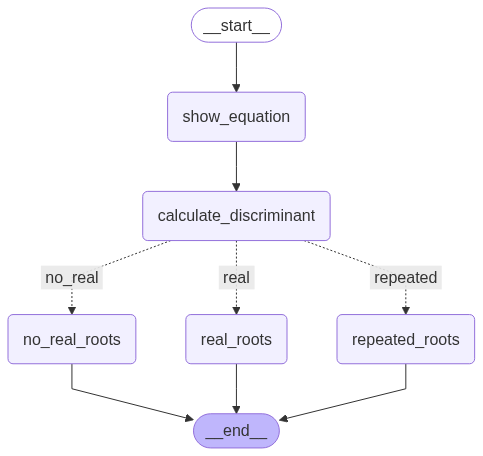

In [11]:
workflow